# Plotting for Mobility Attack Numero Uno

This notebook is an attempt to carry out a trajectory reconstruction attack based on the upload patterns of a particular sensor. We use `simulation/smol_attacks/visualizing_success.ipynb` to inform our decisions.

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

In [2]:
sensor_path = "../smol_truth/sensors.csv"
with open(sensor_path) as sensor_file:
    sensors = pd.read_csv(sensor_file)

In [3]:
sim_path = "../smol_sim/mules/011.csv"
with open(sim_path) as sim_file:
    sim = pd.read_csv(sim_file)

In [4]:
truth_path = "../smol_truth/mules/011.csv"
with open(truth_path) as truth_file:
    truth = pd.read_csv(truth_file)

In [5]:
sensors.head()

,sensor ID,x (m),y (m),radius (m)
0,0,231.2663,120.1813,11.131326
1,1,371.8589,238.2076,11.634567
2,2,757.0289,350.5063,15.115731
3,3,190.9400,140.1613,13.697470
4,4,663.1340,522.3010,14.227241


In [6]:
sim.head()

,sensor ID,norm_secs (secs),time (days)
0,51,49.714156,39746.348237
1,51,50.414355,39746.348246
2,51,51.114555,39746.348254
3,51,51.814754,39746.348262
4,51,52.514953,39746.348270


In [7]:
truth.head()

,x (m),y (m),norm_secs (secs),time (days)
0,797.9213,677.2126,0.000000,39746.347662
1,795.5126,673.8826,3.000007,39746.347697
2,791.9939,673.3276,6.000005,39746.347731
3,786.0776,676.4689,9.000003,39746.347766
4,782.3813,676.2913,12.000001,39746.347801


In [8]:
# Downsample the simulation to only take a sample every 3-ish seconds
down_sim = sim.loc[(sim['norm_secs (secs)'].round() % 8) == 0]
down_sim.head()

,sensor ID,norm_secs (secs),time (days)
9,51,56.015950,39746.348310
24,17,63.718143,39746.348400
25,17,64.418343,39746.348408
42,12,128.136486,39746.349145
53,12,135.838679,39746.349234


In [9]:
t = []
sim_x = []
sim_y = []
sim_r = []

for index, row in down_sim.iterrows():
    t.append(row['norm_secs (secs)'])
    sim_x.append(sensors.iloc[int(row['sensor ID'])]['x (m)'])
    sim_y.append(sensors.iloc[int(row['sensor ID'])]['y (m)'])
    sim_r.append(sensors.iloc[int(row['sensor ID'])]['radius (m)'])

In [10]:
# The goal is to spline. However, splines dont work well with multiple values
# at one point, which happens when we see multiple gateways at the same time.
# Thus, if we see multiple gateways at the same time, we average the positions.
ct = []
cx = []
cy = []

counter = 0
while counter < len(t):
    cur_t = t[counter]
    cum_x = [sim_x[counter]]
    cum_y = [sim_y[counter]]
    counter += 1
    while counter < len(t) and t[counter] == cur_t:
        cum_x.append(sim_x[counter])
        cum_y.append(sim_y[counter])
        counter += 1
    ct.append(cur_t)
    cx.append(sum(cum_x) / len(cum_x))
    cy.append(sum(cum_y) / len(cum_y))

In [11]:
from scipy.interpolate import interp1d

In [12]:
it = np.linspace(ct[0], ct[-1], num=100, endpoint=True)

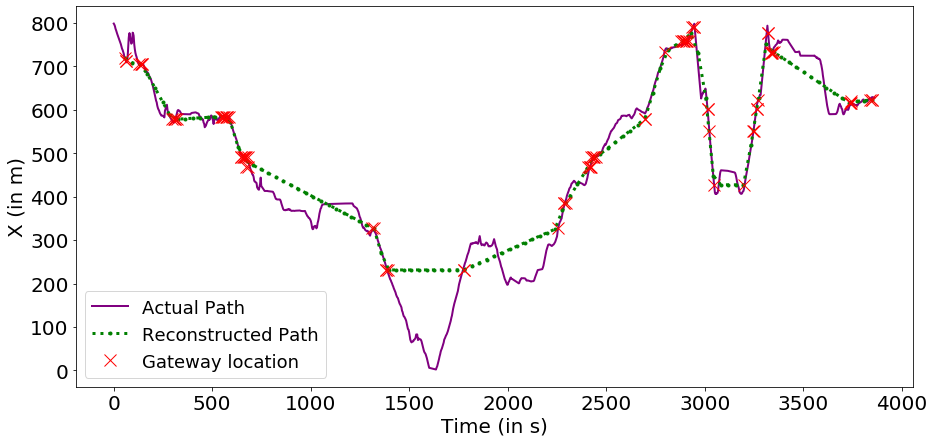

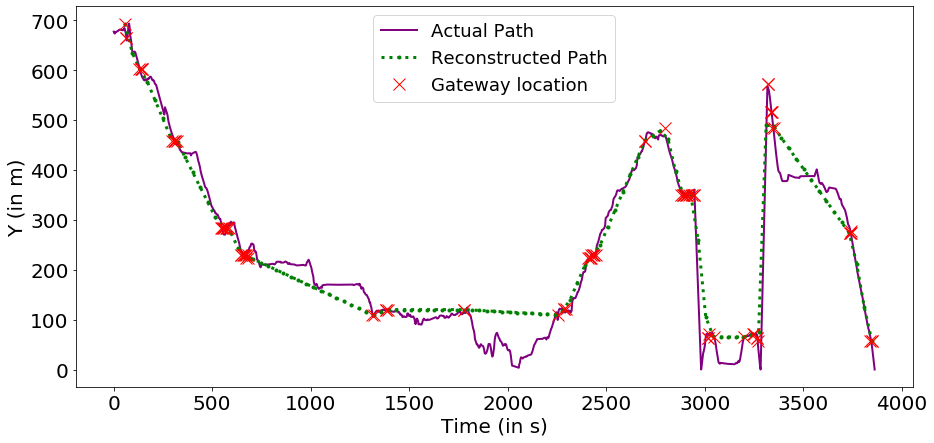

In [13]:
spline_type = 'linear'

fx = interp1d(ct, cx, kind=spline_type)
fy = interp1d(ct, cy, kind=spline_type)

ix = fx(it)
iy = fy(it)

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 20}

# plt.rc('font', **font)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=20)  
plt.rc('figure', titlesize=20)
# X_LIM = 1430
# Y_LIM = 830


# plot x over time
plt.figure(figsize=(15, 7))
# plt.title('Position(X) VS Time')
plt.xlabel('Time (in s)')
plt.ylabel('X (in m)')
plt.plot(truth['norm_secs (secs)'], truth['x (m)'], 'purple', linewidth=2, label='Actual Path')
plt.plot(it, ix, 'g.:', linewidth=3,  label="Reconstructed Path")
plt.plot(t, sim_x, 'rx', markersize=12, label='Gateway location')

# plt.xlim(0,X_LIM)
# plt.ylim(0,Y_LIM)
plt.legend()
plt.savefig('attack_1_x.pdf')
plt.show()

# plot y over time
plt.figure(figsize=(15, 7))
# plt.title('Position(Y) VS Time')
plt.xlabel('Time (in s)')
plt.ylabel('Y (in m)')
plt.plot(truth['norm_secs (secs)'], truth['y (m)'], 'purple', linewidth=2, label='Actual Path')
plt.plot(it, iy, 'g.:', linewidth=3,  label="Reconstructed Path")
plt.plot(t, sim_y, 'rx', markersize=12, label='Gateway location')

# plt.xlim(0,X_LIM)
# plt.ylim(0,Y_LIM)
plt.legend()
plt.savefig('attack_1_y.pdf')
plt.show()


No handles with labels found to put in legend.


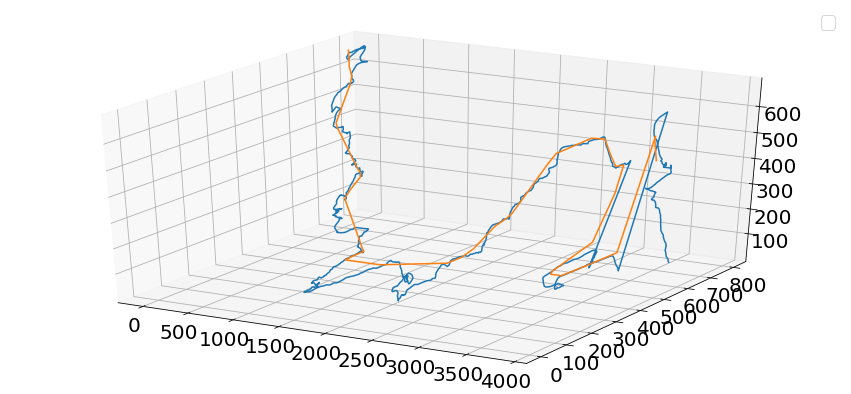

In [14]:
# plot 3D
VAL = -10
plt.figure(figsize=(15, 7))
ax = plt.axes(projection='3d')
# plt.title('Position with time')
# plt.xlabel('time')
# plt.ylabel('x (m)')
ax.plot3D(truth['norm_secs (secs)'][:VAL], truth['x (m)'][:VAL], truth['y (m)'][:VAL])
# ax.set_xlim(0,1000)
# ax.set_ylim(0,1000)
# ax.set_zlim(0,1000)
ax.plot3D(it[:VAL], ix[:VAL], iy[:VAL])

# plt.plot(t, sim_x, 'rx', label='seen gateways')
# plt.plot(it, ix, 'g.:', label='{} spline'.format(spline_type))
plt.legend()
plt.show()

# # plot y over time
# plt.figure(figsize=(15, 7))
# plt.title('y position over time')
# plt.xlabel('time')
# plt.ylabel('y (m)')
# plt.plot(truth['norm_secs (secs)'], truth['y (m)'], label='truth')
# plt.plot(t, sim_y, 'rx', label='seen gateways')
# plt.plot(it, iy, 'g.:', label='{} spline'.format(spline_type))
# plt.legend()
# plt.show()